In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

k,s = sympy.symbols('k s')

#PATH = "/content/drive/MyDrive/Colab_Notebooks/CONTROLE/"

#os.chdir(PATH)
#os.listdir()

# Parâmetros de Desempenho

Normalmente, as especificações de desempenho transitório são dadas em termos de
sistemas de 2a
ordem, ou seja, em termos de fator de amortecimento ($\xi$) e frequência natural ($ω_n$).

$\frac{C(s)}{R(s)} = \frac{ω_n}{s^2 + 2 \xi ω_n + ω_n ^2}$

Com os  polos:

1. $s = -ξω_n \pm j\omega_n \sqrt{1-\xi^2}$

ou

2. $s = -ξω_n \pm j\omega_d$

Sendo $\omega_d$:

* $\omega_d = \omega_n \sqrt{1 - \xi^2}$



Outras especificações podem ser delimitadas no projeto como:

* *Overshoot* ($M_p(\%)$): $M_p(\%) ≤ M$

1. $\frac{M_p(\%)}{100} = e ^{-\frac{\xi \pi}{\sqrt{1 - \xi^2}}}$

Para  $M$  *overshoot* máximo do projeto.

* Tempoo de acomodação ($t_s$): $t_s ≤ T$

Para T tempo máximo de acomodação. O qual pode ser:

1. $t_s(2\%) = \frac{4}{\xi \omega_n}$
2. $t_s(5\%) = \frac{3}{\xi \omega_n}$

E os polos devem está localizados em:

* $\xi \omega_n ≤ (\xi \omega_n)_{min}$

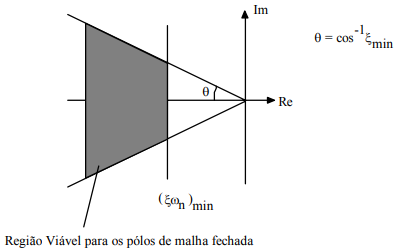

In [ ]:
def fator_de_acomodacao(Mp):
    return (np.sqrt((np.log(Mp)**2)/(np.pi**2 + np.log(Mp)**2)))

def tempo_de_acomodacao_2(fator_de_acomodacao, omegaN):
    return (4 / (fator_de_acomodacao * omegaN))

def tempo_de_acomodacao_5(fator_de_acomodacao, omegaN):
    return (3 / (fator_de_acomodacao * omegaN))

def omega_n_ts2(ts, fator_de_acomodacao):
    return (4/(ts*fator_de_acomodacao))

def omega_n_ts5(ts, fator_de_acomodacao):
    return (3/(ts*fator_de_acomodacao))


# Projeto de PD

* $G_c(s) = K_p ( 1 + t+ds) = K_p t_d (s+\frac{1}{t_d}) = K_c (s + z)$

ou

* $G_c(s) = K_p + K_d s = k_d (s + \frac{K_p}{K_d}) =  K_c (s + z)$

Para $Kc$:

* $K_c = K_d$

O ganho total $K_t$ é calculado pelo critério de Módulo a partir dos parâmetros de desempenho delimitado:

1. $K_t = \frac{\prod_{i=1}^{n_p}A_i}{\prod_{j=1}^{n_p}B_j}$

2. $K_t = \frac{k_c}{K}$

Sendo $K$ o ganho da Planta.

## Exemplo

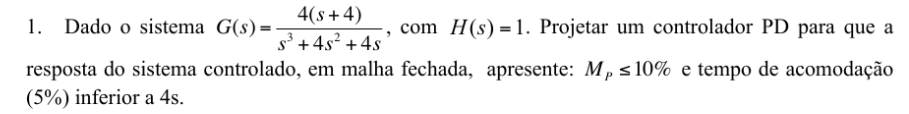

In [ ]:
k,s = sympy.symbols('k s')

TemZeros = True

K = 4
GsHsZeros = sympy.Poly(s + 4)
GsHsPolos = sympy.Poly(s**3 + 4*s**2 + 4*s)
print()
display(GsHsZeros)
display(GsHsPolos)
display(K * GsHsZeros / GsHsPolos)
print()

Mp = 10 / 100
ts = 4

Emin = fator_de_acomodacao(Mp)
# Emin = 0.7
print(f'Fator de acomodacao minimo: {Emin}')

wn = omega_n_ts5(ts, Emin)
# wn = 0.5
print(f'Omega_n: {wn}')

print(f'\nAchando o valor minimo de especificação de desempenho\n')

polosDesempenho = np.complex128(-Emin*wn + 1.j * (wn*np.sqrt(1-Emin**2)))
wd = polosDesempenho.imag
print("Polos das especificações de desempenho:")
print(f's = {polosDesempenho}')
print(f'wd = {wd}')
print()

Polos = np.array(sympy.nroots(GsHsPolos), dtype=np.complex128)
print(f'Polos de Gs: {Polos}')
print(type(Polos))

print()

if (isinstance(GsHsZeros, sympy.Poly)) == False:
    Zeros = np.array([0], dtype=np.complex128)
    TemZeros = False
else:
    Zeros = np.array(sympy.nroots(GsHsZeros), dtype=np.complex128)
    print(f'Polos de Gs: {Zeros}')
    print(type(Zeros))

Poly(s + 4, s, domain='ZZ')

Poly(s**3 + 4*s**2 + 4*s, s, domain='ZZ')

(4*s + 16)/(s**3 + 4*s**2 + 4*s)


Fator de acomodacao minimo: 0.5911550337988974
Omega_n: 1.26870272114631

Achando o valor minimo de especificação de desempenho

Polos das especificações de desempenho:
s = (-0.75+1.0232822653813813j)
wd = 1.0232822653813813

Polos de Gs: [ 0.+0.00000000e+00j -2.-2.65389694e-14j -2.+4.59336980e-14j]
<class 'numpy.ndarray'>

Polos de Gs: [-4.+0.j]
<class 'numpy.ndarray'>


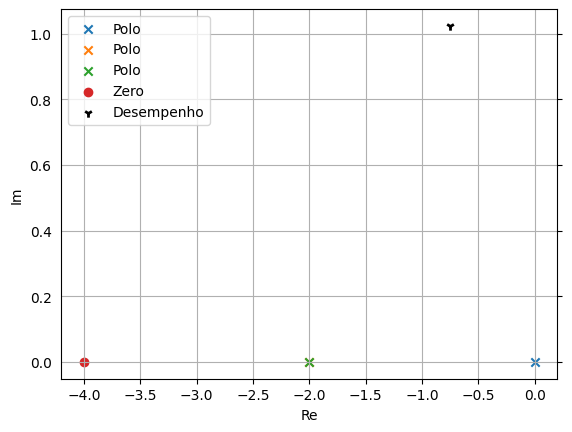

In [ ]:
for i in Polos:
    plt.scatter(i.real, i.imag, marker='x', label="Polo")

if TemZeros == True:
    for i in Zeros:
        plt.scatter(i.real, i.imag, marker='o', label="Zero")

plt.scatter(np.real(polosDesempenho), np.imag(polosDesempenho), marker='1', color='black', label="Desempenho", linewidth=2)

plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = False
plt.tick_params()
plt.grid()
plt.legend()
plt.xlabel('Re')
plt.ylabel('Im')

plt.show()

In [ ]:
# Soma dos angulos dos polos
Thetas = np.zeros(len(Polos), dtype=np.float32)
ThetasSum = 0

# Calcula o ângulo entre s e cada polo
for i in range(len(Thetas)):
    delta = polosDesempenho - Polos[i]
    # print(delta)
    Thetas[i] = np.arctan2(delta.imag, delta.real)

SumThetas = np.sum(Thetas)

print("Theta")
print(f'Radiano: {Thetas}')
print(f'Graus: {np.rad2deg(Thetas)}')
print(f'Total Rad:{SumThetas}')
print(f'Total Graus:{np.rad2deg(SumThetas)}')
print()

# ==============================================================

# Criterio de ângulo para encontrar o PHI
# do zero

# Soma dos angulos dos Zeros
if TemZeros == True:
    Phi = np.zeros(len(Zeros), dtype=np.float32)
    PhiSum = 0

    # Calcula o ângulo entre s e cada polo
    for i in range(len(Phi)):
        delta = polosDesempenho - Zeros[i]
        # print(delta)
        Phi[i] = np.arctan2(delta.imag, delta.real)

    SumPhi = np.sum(Phi)

else:
    Phi = 0
    SumPhi = 0

print("Phi")
print(f'Radiano: {Phi}')
print(f'Graus: {np.rad2deg(Phi)}')
print(f'Total Rad:{SumPhi}')
print(f'Total Graus:{np.rad2deg(SumPhi)}')
print()

# Valor para o passar no criterio de angulo
Zphi = SumThetas - np.pi - SumPhi
print(f'Angulo do Zc (rad) = {Zphi}')
print(f'Angulo do Zc (Graus) = {np.rad2deg(Zphi)}')

Theta
Radiano: [2.2032864 0.6859954 0.6859954]
Graus: [126.239006  39.304638  39.304638]
Total Rad:3.575277090072632
Total Graus:204.84828186035156

Phi
Radiano: [0.3050299]
Graus: [17.476925]
Total Rad:0.30502989888191223
Total Graus:17.476924896240234

Angulo do Zc (rad) = 0.12865445017814636
Angulo do Zc (Graus) = 7.37135648727417


In [ ]:
Zc =  wd / (np.tan(Zphi)) + np.abs(polosDesempenho.real)
Zc = Zc*-1

print(f'Zero do controlador (Zc):')
print(f'Zc: {Zc}')

Zero do controlador (Zc):
Zc: -8.659794629285244


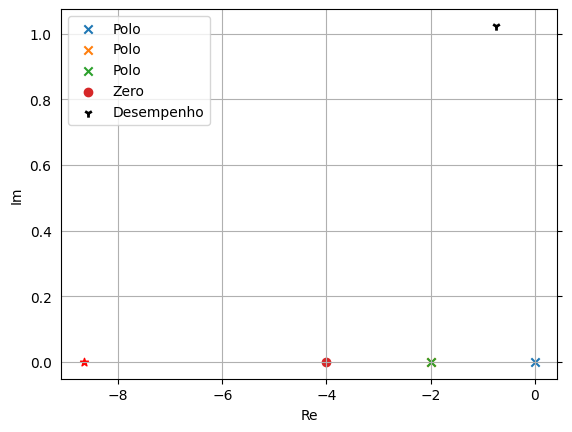

In [ ]:
for i in Polos:
    plt.scatter(i.real, i.imag, marker='x', label="Polo")

if TemZeros == True:
    for i in Zeros:
        plt.scatter(i.real, i.imag, marker='o', label="Zero")

plt.scatter(Zc, 0, marker="*", color="red")

plt.scatter(np.real(polosDesempenho), np.imag(polosDesempenho), marker='1', color='black', label="Desempenho", linewidth=2)

plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = False
plt.tick_params()
plt.grid()
plt.legend()
plt.xlabel('Re')
plt.ylabel('Im')

plt.show()

In [ ]:
# CAlcular Kt para achar Kd e Kp

SumModulosA = 1;
for i in range(0, len(Polos)):
    SumModulosA *= np.sqrt((wd - Polos[i].imag)**2 + (polosDesempenho.real - Polos[i].real)**2)

if TemZeros == True:
    SumModulosB = 1
    for i in range(0, len(Zeros)):
        SumModulosB *= np.sqrt((wd - Zeros[i].imag)**2 + (polosDesempenho.real - Zeros[i].real)**2)
else:
    SumModulosB = 1;

SumModulosB *= np.sqrt((wd - 0)**2 + (polosDesempenho.real - Zc)**2)

print(f'Somatorio dos modulos A = {SumModulosA}')
print(f'Somatorio dos modulos B = {SumModulosB}')
print()

Kt = SumModulosA / SumModulosB
print(f'Kt = {Kt}')

Somatorio dos modulos A = 3.3108149877462383
Somatorio dos modulos B = 27.175536853729128

Kt = 0.12183071140660524


In [ ]:
Kc = Kt / K
print(f'Kc = {Kc}')

Kd = Kc
print(f'Kd = {Kd}')

Kp = np.abs(Zc*Kc)
print(f'Kp = {Kp}')

Kc = 0.03045767785165131
Kd = 0.03045767785165131
Kp = 0.26375723508023013


## Funções para calcular o PD

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

k,s = sympy.symbols('k s')

def PD_Polos_e_Zeros(Numerador, Denominador, K, Mp, ts, use_ts2, _wn = None,
                     _Emin = None, Raizes= None):
    Numerador *= K
    display(Numerador*1/Denominador)
    print()

    if _Emin == None and Raizes == None:
        Emin = fator_de_acomodacao(Mp)
        print(f'Fator de acomodacao minimo: {Emin}')
    else:
        Emin = _Emin
        print(f'Fator de acomodacao minimo: {Emin}')

    if _wn == None and Raizes == None:
        if use_ts2 == True:
            wn = omega_n_ts2(ts, Emin)
        else:
            wn = omega_n_ts5(ts, Emin)
        print(f'Omega_n: {wn}')
    elif Raizes == None:
        wn = _wn
        print(f'Omega_n: {wn}')

    print(f'\nAchando o valor minimo de especificação de desempenho\n')

    if Raizes == None:
        RaizesDesempenho = np.complex128(-Emin*wn + 1.j * (wn*np.sqrt(1-Emin**2)))
        wd = RaizesDesempenho.imag
    else:
        RaizesDesempenho = Raizes
        wd = RaizesDesempenho.imag

    print("Polos das especificações de desempenho:")
    print(f's = {RaizesDesempenho}')
    print(f'wd = {wd}')
    print()

    display(Numerador)
    display(Denominador)

    Polos = np.array(sympy.nroots(sympy.expand(Denominador), maxsteps=1000), dtype=np.complex128)
    print(f'Polos de GsHs: {Polos}')

    print()
    try:
        Zeros = np.array(sympy.nroots(Numerador), dtype=np.complex128)
        print(f'Zeros de Gs: {Zeros}')
    except:
        Zeros = np.empty([0], dtype=np.complex128)
        print(f'Zeros de Gs: {Zeros}')

    print()

    return Polos, Zeros, RaizesDesempenho

#===========================================================
#===========================================================

def PD_Thetas_e_Phi(Polos, Zeros, Raizes):
    # Soma dos angulos dos polos
    Thetas = np.zeros(len(Polos), dtype=np.float32)
    ThetasSum = 0

    # Calcula o ângulo entre s e cada polo
    for i in range(len(Thetas)):
        delta = Raizes - Polos[i]
        # print(delta)
        Thetas[i] = np.arctan2(delta.imag, delta.real)

    SumThetas = np.sum(Thetas)

    print("Theta")
    print(f'Radiano: {Thetas}')
    print(f'Graus: {np.rad2deg(Thetas)}')
    print(f'Total Rad:{SumThetas}')
    print(f'Total Graus:{np.rad2deg(SumThetas)}')
    print()

    #==============================================================

    # Criterio de ângulo para encontrar o PHI
    # do zero

    # Soma dos angulos dos Zeros
    if Zeros.size > 0:
        Phi = np.zeros(len(Zeros), dtype=np.float32)
        PhiSum = 0

        # Calcula o ângulo entre s e cada polo
        for i in range(len(Phi)):
            delta = Raizes - Zeros[i]
            # print(delta)
            Phi[i] = np.arctan2(delta.imag, delta.real)

        SumPhi = np.sum(Phi)

    else:
        Phi = 0
        SumPhi = 0

    print("Phi")
    print(f'Radiano: {Phi}')
    print(f'Graus: {np.rad2deg(Phi)}')
    print(f'Total Rad:{SumPhi}')
    print(f'Total Graus:{np.rad2deg(SumPhi)}')
    print()

    # Valor para o passar no criterio de angulo
    Zphi = SumThetas - np.pi - SumPhi
    print(f'Angulo do Zc (rad) = {Zphi}')
    print(f'Angulo do Zc (Graus) = {np.rad2deg(Zphi)}')

    return Zphi


#====================================================
#====================================================

def PD_Kt_Kc_Kd_Kp(Polos, Zeros, Raizes):
    wd = Raizes.imag

    SumModulosA = 1;
    for i in range(0, len(Polos)):
        SumModulosA *= np.sqrt((wd - Polos[i].imag)**2 +
                                (Raizes.real - Polos[i].real)**2)

    if Zeros.size > 0:
        SumModulosB = 1
        for i in range(0, len(Zeros)):
            SumModulosB *= np.sqrt((wd - Zeros[i].imag)**2 +
                                    (Raizes.real - Zeros[i].real)**2)
    else:
        SumModulosB = 1;

    SumModulosB *= np.sqrt((wd - 0)**2 + (Raizes.real - Zc)**2)

    print(f'Somatorio dos modulos A = {SumModulosA}')
    print(f'Somatorio dos modulos B = {SumModulosB}')
    print()

    Kt = SumModulosA / SumModulosB
    print(f'Kt = {Kt}')

    Kc = Kt / K
    print(f'Kc = {Kc}')

    Kd = Kc
    print(f'Kd = {Kd}')

    Kp = np.abs(Zc*Kc)
    print(f'Kp = {Kp}')

    return Kt, Kc, Kd, Kp

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

k,s = sympy.symbols('k s')

# K = 4
# Numerador = (s + 4)
# Denominador = (s**3 + 4*s**2 + 4*s)
K = 2
Numerador = 1
Denominador = s**2

# caso a questao de os polos de vez
# dos parametros (Corrigir o código pra que
# funcione quando disponibiliza somente as raizes de desempenho)
# s = -2.3792 + 2.3363j

wn = 0.5
Emin = 0.7

Mp = 20 / 100
ts_2 = 4

# Polos, Zeros, Raizes = PD_Polos_e_Zeros(Numerador, Denominador, K, Mp, ts_5, False)
Polos, Zeros, Raizes = PD_Polos_e_Zeros(Numerador, Denominador, K, Mp, ts_2,
                                        use_ts2=True, _wn=None, _Emin=None, Raizes=None)

Zphi = PD_Thetas_e_Phi(Polos, Zeros, Raizes)

Zc =  Raizes.imag / (np.tan(Zphi)) + np.abs(Raizes.real)
Zc = Zc*-1

print(f'Zero do controlador, Zc = {Zc}\n')

Kt, Kc, Kd, Kp = PD_Kt_Kc_Kd_Kp(Polos, Zeros, Raizes)

2/s**2


Fator de acomodacao minimo: 0.4559498107691261
Omega_n: 2.193223851355776

Achando o valor minimo de especificação de desempenho

Polos das especificações de desempenho:
s = (-0.9999999999999999+1.9519812658311713j)
wd = 1.9519812658311713



2

s**2

Polos de GsHs: [0.+0.j 0.+0.j]

Zeros de Gs: []

Theta
Radiano: [2.0442355 2.0442355]
Graus: [117.12606 117.12606]
Total Rad:4.088470935821533
Total Graus:234.2521209716797

Phi
Radiano: 0
Graus: 0.0
Total Rad:0
Total Graus:0.0

Angulo do Zc (rad) = 0.94687819480896
Angulo do Zc (Graus) = 54.25212097167969
Zero do controlador, Zc = -2.4051155323548703

Somatorio dos modulos A = 4.81023086215586
Somatorio dos modulos B = 2.4051154902458993

Kt = 1.9999999507982302
Kc = 0.9999999753991151
Kd = 0.9999999753991151
Kp = 2.4051154731868998


# PI

* $G_c(s) = K_p + \frac{K_i}{s} = \frac{s K_p + K_i}{s} = K_c \frac{s + Z_c}{s}$

Onde:

1. $K_p = K_c$
2. $K_i = K_c Z_c$

O ganho $K_c$ pode ser calculador por:

* $K_c = \frac{K_t}{K_g K_h}$

## Exemplo

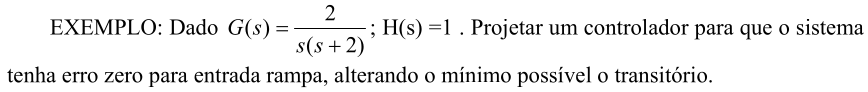

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

k,s = sympy.symbols('k s')

K = 2
Numerador = 1
Denominador = (s * (s +2))

display(Numerador)
display(Denominador)
print()

Polos = np.array(sympy.nroots(Denominador), dtype=np.complex128)
print(f'Polos de Gs: {Polos}')

print()

try:
    Zeros = np.array(sympy.nroots(Numerador), dtype=np.complex128)
    print(f'Zeros de Gs: {Zeros}')
except:
    Zeros = np.empty([0], dtype=np.complex128)
    print(f'Zeros de Gs: {Zeros}')


1

s*(s + 2)


Polos de Gs: [-2.+0.j  0.+0.j]

Zeros de Gs: []


## Funções PI

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

def PI_Polos_e_Zeros(Numerador, Denominador, K, Mp, ts, use_ts2, _wn = None,
                     _Emin = None, Raizes= None):

    Numerador *= K
    display(Numerador*1/Denominador)
    print()

    if _Emin == None and Raizes == None:
        Emin = fator_de_acomodacao(Mp)
        print(f'Emin = {Emin}')
    else:
        Emin = _Emin
        print(f'Emin = {Emin}')

    if _wn == None and Raizes == None:
        if use_ts2 == True:
            wn = omega_n_ts2(ts, Emin)
        else:
            wn = omega_n_ts5(ts, Emin)
        print(f'wn = {wn}')
    elif Raizes == None:
        wn = _wn
        print(f'wn = {wn}')

    print(f'\nAchando o valor minimo de especificação de desempenho\n')

    if Raizes == None:
        RaizesDesempenho = np.complex128(-Emin*wn + 1.j * (wn*np.sqrt(1-Emin**2)))
        wd = RaizesDesempenho.imag
    else:
        RaizesDesempenho = Raizes
        wd = RaizesDesempenho.imag

    print("Polos das especificações de desempenho:")
    print(f's = {RaizesDesempenho}')
    print(f'wd = {wd}')
    print()

    display(Numerador)
    display(Denominador)
    print()

    Polos = np.array(sympy.nroots(sympy.expand(Denominador), maxsteps=1000),
                     dtype=np.complex128)
    # Como é um PID, acrescentar mais um Polo
    # Na origem
    Polos = np.append(Polos, 0)
    print(f'Polos = {Polos}')

    print()
    try:
        Zeros = np.array(sympy.nroots(Numerador), dtype=np.complex128)
        print(f'Zeros: {Zeros}')
    except:
        Zeros = np.empty([0], dtype=np.complex128)
        print(f'Zeros: {Zeros}')

    print()

    return Polos, Zeros, RaizesDesempenho

# ==============================================
#   Calculo do Angulo de Z1 e Z2
# ==============================================
def PI_Thetas_e_Phi(Polos, Zeros, Raizes):
    # Soma dos angulos dos polos
    Thetas = np.zeros(len(Polos), dtype=np.float32)
    ThetasSum = 0

    # Calcula o ângulo entre s e cada polo
    for i in range(len(Thetas)):
        delta = Raizes - Polos[i]
        # print(f'DeltaThetas = {delta}')
        Thetas[i] = np.arctan2(delta.imag, delta.real)

    SumThetas = np.sum(Thetas)

    print("Theta")
    print(f'Radiano: {Thetas}')
    print(f'Graus: {np.rad2deg(Thetas)}')
    print(f'Total Rad:{SumThetas}')
    print(f'Total Graus:{np.rad2deg(SumThetas)}')
    print()

    # Soma dos angulos dos Zeros
    if Zeros.size > 0:
        Phi = np.zeros(len(Zeros), dtype=np.float32)
        PhiSum = 0
        # Calcula o ângulo entre s e cada polo
        for i in range(len(Phi)):
            delta = Raizes - Zeros[i]
            # print(f'DeltaPhi = {delta}')
            Phi[i] = np.arctan2(delta.imag, delta.real)
        SumPhi = np.sum(Phi)

    else:
        Phi = 0
        SumPhi = 0

    print("Phi")
    print(f'Radiano: {Phi}')
    print(f'Graus: {np.rad2deg(Phi)}')
    print(f'Total Rad:{SumPhi}')
    print(f'Total Graus:{np.rad2deg(SumPhi)}')
    print()

    # Valor para o passar no criterio de angulo
    # Dividindo por dois, pois ha 2 zeros
    Zphi = (SumThetas - np.pi - SumPhi)
    print(f'Angulo do Zc (rad) = {Zphi}')
    print(f'Angulo do Zc (Graus) = {np.rad2deg(Zphi)}')
    print()

    return Zphi

# =========================================
#  CALCULO dos ganhos: Kt, Ki, Kd, Kp, Kc
# =========================================
def PI_Kt_Kc_Kd_Kp(Polos, Zeros, Raizes, Zc):
    wd = Raizes.imag
    SumModulosA = 1;
    for i in range(0, len(Polos)):
        SumModulosA *= np.sqrt((wd - Polos[i].imag)**2 +
                                    (Raizes.real - Polos[i].real)**2)

        # print(np.sqrt((wd - Polos[i].imag)**2 +
                                    # (Raizes.real - Polos[i].real)**2))

    if Zeros.size > 0:
        SumModulosB = 1
        for i in range(0, len(Zeros)):
            SumModulosB *= np.sqrt((wd - Zeros[i].imag)**2 +
                                    (Raizes.real - Zeros[i].real)**2)

            # print(np.sqrt((wd - Zeros[i].imag)**2 +
            #                         (Raizes.real - Zeros[i].real)**2))
    else:
        SumModulosB = 1;

    print()
    print(f'Somatorio dos modulos A = {SumModulosA}')
    print(f'Somatorio dos modulos B = {SumModulosB}')
    print()

    Kt = SumModulosA / SumModulosB
    print(f'Kt = {Kt}')
    Kc = Kt / K
    print(f'Kc = {Kc}')
    Kp = np.abs(Zc*Kc)
    print(f'Kp = {Kp}')
    Ki = Kc * Zc
    print(f'Ki = {Ki}')

    return Kt, Kc, Ki, Kp

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

k,s = sympy.symbols('k s')

K = 5
Numerador = 0.2 * (s**2 + 5*s+4)
Denominador = (s**2 + 4*s + 4)*(s+1)


wn = 0.5
Emin = 0.7

Mp = 20 / 100
ts = 5

Emin = fator_de_acomodacao(Mp)
wn = omega_n_ts2(ts_2, Emin)

s = -4 + 4j

# Polos, Zeros, Raizes = PD_Polos_e_Zeros
# (Numerador, Denominador, K, Mp, ts_5, False)
Polos, Zeros, Raizes = PI_Polos_e_Zeros(Numerador, Denominador, K, Mp,
                                        ts, use_ts2=True, _wn=None,
                                        _Emin=None, Raizes=s)

Zphi = PI_Thetas_e_Phi(Polos, Zeros, Raizes)

Zc =  Raizes.imag / (np.tan(Zphi)) + np.abs(Raizes.real)
Zc = Zc*-1

print(f'Zc = {Zc}')

Zeros = np.append(Zeros,Zc)

_,_,_,_ = PI_Kt_Kc_Kd_Kp(Polos, Zeros, Raizes, np.abs(Zc))

(1.0*s**2 + 5.0*s + 4.0)/((s + 1)*(s**2 + 4*s + 4))


Emin = None

Achando o valor minimo de especificação de desempenho

Polos das especificações de desempenho:
s = (-4+4j)
wd = 4.0



1.0*s**2 + 5.0*s + 4.0

(s + 1)*(s**2 + 4*s + 4)


Polos = [-2.+0.j -2.+0.j -1.+0.j  0.+0.j]

Zeros: [-4.+0.j -1.+0.j]

Theta
Radiano: [2.0344439 2.0344439 2.2142975 2.3561945]
Graus: [116.56504  116.56504  126.869896 135.      ]
Total Rad:8.639379501342773
Total Graus:494.9999694824219

Phi
Radiano: [1.5707964 2.2142975]
Graus: [ 90.       126.869896]
Total Rad:3.7850937843322754
Total Graus:216.86988830566406

Angulo do Zc (rad) = 1.7126927375793457
Angulo do Zc (Graus) = 98.13005828857422

Zc = -3.4285740852355957

Somatorio dos modulos A = 565.685424949226
Somatorio dos modulos B = 80.81219605001297

Kt = 7.000000650881151
Kc = 1.4000001301762302
Kp = 4.800004165648684
Ki = 4.800004165648684


# PID

* $G_c(s) = K_p + \frac{K_i}{s} + K_d s = s^2 K_d + s K_p + K_i = K_c \frac{(s+z_1)(s+z_2}{s}$

Onde:

* $K_c = \frac{K_t}{K_G K_h}$

Como Geralmente há uma variável à mais do que equação (um zero a mais), utiliza-se alguma condição para reduzir a quantidades de varáveis, como por exemplo:

1. Colocar os dois Polos na mesma posição ($Z_1$ = $Z_2$);

2. Colocar um zero afastado $x$ posições do outro;

3. Um polo ser múltiplo do outro;

4. ...

## Exemplo

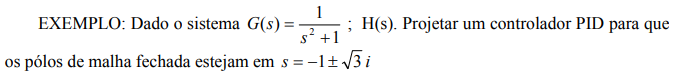

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

k,s = sympy.symbols('k s')

K = 1
Numerador = 1
Denominador = s**2 + 1


wn = 0.5
Emin = 0.7

Mp = 20 / 100
ts_2 = 5


Emin = fator_de_acomodacao(Mp)
wn = omega_n_ts2(ts_2, Emin)


print(f'Emin = {Emin}')
print(f'wn = {wn}')

# Organizar o código quando a questão
# dar os dados das raizes, de vez dos
# parametros
s = -1 + np.sqrt(3)*1j
Raizes = s
# s = -Emin*wn + 1j*np.sqrt(1-Emin**2)*wn
# Raizes = s
print(f's = {Raizes}')

wd = s.imag
print(f'wd = {wd}')
print()

display(Numerador)
display(Denominador)

Polos = np.array(sympy.nroots(sympy.expand(Denominador)), dtype=np.complex128)
# Como é um PID, acrescentar mais um Polo
# Na origem
Polos = np.append(Polos, 0)
print(f'Polos: {Polos}')

print()
try:
    Zeros = np.array(sympy.nroots(Numerador), dtype=np.complex128)
    print(f'Zeros de Gs: {Zeros}')
except:
    Zeros = np.empty([0], dtype=np.complex128)
    print(f'Zeros de Gs: {Zeros}')
print()

Emin = 0.4559498107691261
wn = 1.754579081084621
s = (-1+1.7320508075688772j)
wd = 1.7320508075688772



1

s**2 + 1

Polos: [0.-1.j 0.+1.j 0.+0.j]

Zeros de Gs: []



In [ ]:
# ==============================================
#   Calculo do Angulo de Z1 e Z2
# ==============================================
# Soma dos angulos dos polos
Thetas = np.zeros(len(Polos), dtype=np.float32)
ThetasSum = 0

# Calcula o ângulo entre s e cada polo
for i in range(len(Thetas)):
    delta = Raizes - Polos[i]
    # print(delta)
    Thetas[i] = np.arctan2(delta.imag, delta.real)

SumThetas = np.sum(Thetas)

print("Theta")
print(f'Radiano: {Thetas}')
print(f'Graus: {np.rad2deg(Thetas)}')
print(f'Total Rad:{SumThetas}')
print(f'Total Graus:{np.rad2deg(SumThetas)}')
print()

# Soma dos angulos dos Zeros
if Zeros.size > 0:
    Phi = np.zeros(len(Zeros), dtype=np.float32)
    PhiSum = 0
    # Calcula o ângulo entre s e cada polo
    for i in range(len(Phi)):
        delta = Raizes - Zeros[i]
        # print(delta)
        Phi[i] = np.arctan2(delta.imag, delta.real)
    SumPhi = np.sum(Phi)

else:
    Phi = 0
    SumPhi = 0

print("Phi")
print(f'Radiano: {Phi}')
print(f'Graus: {np.rad2deg(Phi)}')
print(f'Total Rad:{SumPhi}')
print(f'Total Graus:{np.rad2deg(SumPhi)}')
print()

# Valor para o passar no criterio de angulo
# Dividindo por dois, pois ha 2 zeros
Zphi = (SumThetas - np.pi - SumPhi) / 2
print(f'Angulo do Zc (rad) = {Zphi}')
print(f'Angulo do Zc (Graus) = {np.rad2deg(Zphi)}')


Theta
Radiano: [1.9216757 2.5096784 2.0943952]
Graus: [110.1039  143.79398 120.     ]
Total Rad:6.525749206542969
Total Graus:373.8978576660156

Phi
Radiano: 0
Graus: 0.0
Total Rad:0
Total Graus:0.0

Angulo do Zc (rad) = 1.6920782327651978
Angulo do Zc (Graus) = 96.94893646240234


In [ ]:
Zc =  Raizes.imag / (np.tan(Zphi)) + np.abs(Raizes.real)
Zc = Zc*-1

Z1 = Zc
Z2 = Zc

print(f'Z1 = {Z1}')
print(f'Z2 = {Z2}')

Zeros = np.append(Z1,Z2)
print(f'Zeros = {Zeros}')

Z1 = -0.7888975112697667
Z2 = -0.7888975112697667
Zeros = [-0.78889751 -0.78889751]


In [ ]:
# ===================================
#  CALCULO dos ganhos: Kt, Ki, Kd, Kp, Kc
# =============================
SumModulosA = 1;
for i in range(0, len(Polos)):
    SumModulosA *= np.sqrt((wd - Polos[i].imag)**2 +
                                (Raizes.real - Polos[i].real)**2)

if Zeros.size > 0:
    SumModulosB = 1
    for i in range(0, len(Zeros)):
        SumModulosB *= np.sqrt((wd - Zeros[i].imag)**2 +
                                (Raizes.real - Zeros[i].real)**2)
else:
    SumModulosB = 1;

print()
print(f'Somatorio dos modulos A = {SumModulosA}')
print(f'Somatorio dos modulos B = {SumModulosB}')
print()

Kt = SumModulosA / SumModulosB
print(f'Kt = {Kt}')
Kc = Kt / K
print(f'Kc = {Kc}')
Kd = Kc
print(f'Kd = {Kd}')
Kp = np.abs(Zc*Kc)
print(f'Kp = {Kp}')


Somatorio dos modulos A = 7.2111025509279765
Somatorio dos modulos B = 3.044564260748098

Kt = 2.3685171122504385
Kc = 2.3685171122504385
Kd = 2.3685171122504385
Kp = 1.8685172552542255


## Funcoes para calcular PID

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

def PID_Polos_e_Zeros(Numerador, Denominador, K, Mp, ts, use_ts2, _wn = None,
                     _Emin = None, Raizes= None):
    Numerador *= K
    display(Numerador*1/Denominador)
    print()

    if _Emin == None and Raizes == None:
        Emin = fator_de_acomodacao(Mp)
        print(f'Emin = {Emin}')
    else:
        Emin = _Emin
        print(f'Emin = {Emin}')

    if _wn == None and Raizes == None:
        if use_ts2 == True:
            wn = omega_n_ts2(ts, Emin)
        else:
            wn = omega_n_ts5(ts, Emin)
        print(f'wn = {wn}')
    elif Raizes == None:
        wn = _wn
        print(f'wn = {wn}')

    print(f'\nAchando o valor minimo de especificação de desempenho\n')

    if Raizes == None:
        RaizesDesempenho = np.complex128(-Emin*wn + 1.j * (wn*np.sqrt(1-Emin**2)))
        wd = RaizesDesempenho.imag
    else:
        RaizesDesempenho = Raizes
        wd = RaizesDesempenho.imag

    print("Polos das especificações de desempenho:")
    print(f's = {RaizesDesempenho}')
    print(f'wd = {wd}')
    print()

    display(Numerador)
    display(Denominador)
    print()

    Polos = np.array(sympy.nroots(sympy.expand(Denominador), maxsteps=1000),
                     dtype=np.complex128)
    # Como é um PID, acrescentar mais um Polo
    # Na origem
    Polos = np.append(Polos, 0)
    print(f'Polos (+Polo do PID) = {Polos}')

    print()
    try:
        Zeros = np.array(sympy.nroots(Numerador), dtype=np.complex128)
        print(f'Zeros: {Zeros}')
    except:
        Zeros = np.empty([0], dtype=np.complex128)
        print(f'Zeros: {Zeros}')

    print()

    return Polos, Zeros, RaizesDesempenho

# ==============================================
#   Calculo do Angulo de Z1 e Z2
# ==============================================
def PID_Thetas_e_Phi(Polos, Zeros, Raizes):
    # Soma dos angulos dos polos
    Thetas = np.zeros(len(Polos), dtype=np.float32)
    ThetasSum = 0

    # Calcula o ângulo entre s e cada polo
    for i in range(len(Thetas)):
        delta = Raizes - Polos[i]
        # print(delta)
        Thetas[i] = np.arctan2(delta.imag, delta.real)

    SumThetas = np.sum(Thetas)

    print("Theta")
    print(f'Radiano: {Thetas}')
    print(f'Graus: {np.rad2deg(Thetas)}')
    print(f'Total Rad:{SumThetas}')
    print(f'Total Graus:{np.rad2deg(SumThetas)}')
    print()

    # Soma dos angulos dos Zeros
    if Zeros.size > 0:
        Phi = np.zeros(len(Zeros), dtype=np.float32)
        PhiSum = 0
        # Calcula o ângulo entre s e cada polo
        for i in range(len(Phi)):
            delta = Raizes - Zeros[i]
            # print(delta)
            Phi[i] = np.arctan2(delta.imag, delta.real)
        SumPhi = np.sum(Phi)

    else:
        Phi = 0
        SumPhi = 0

    print("Phi")
    print(f'Radiano: {Phi}')
    print(f'Graus: {np.rad2deg(Phi)}')
    print(f'Total Rad:{SumPhi}')
    print(f'Total Graus:{np.rad2deg(SumPhi)}')
    print()

    # Valor para o passar no criterio de angulo
    # Dividindo por dois, pois ha 2 zeros
    Zphi = (SumThetas - np.pi - SumPhi) / 2
    print(f'Angulo do Zc (rad) = {Zphi}')
    print(f'Angulo do Zc (Graus) = {np.rad2deg(Zphi)}')
    print()

    return Zphi

# =========================================
#  CALCULO dos ganhos: Kt, Ki, Kd, Kp, Kc
# =========================================
def PID_Kt_Kc_Kd_Kp(Polos, Zeros, Raizes, Zc):
    SumModulosA = 1;
    for i in range(0, len(Polos)):
        SumModulosA *= np.sqrt((wd - Polos[i].imag)**2 +
                                    (Raizes.real - Polos[i].real)**2)

        print(np.sqrt((wd - Polos[i].imag)**2 +
                                    (Raizes.real - Polos[i].real)**2))
    print()
    if Zeros.size > 0:
        SumModulosB = 1
        for i in range(0, len(Zeros)):
            SumModulosB *= np.sqrt((wd - Zeros[i].imag)**2 +
                                    (Raizes.real - Zeros[i].real)**2)

            print(np.sqrt((wd - Zeros[i].imag)**2 +
                                   (Raizes.real - Zeros[i].real)**2))
    else:
        SumModulosB = 1;

    print()
    print(f'Somatorio dos modulos A = {SumModulosA}')
    print(f'Somatorio dos modulos B = {SumModulosB}')
    print()

    Kt = SumModulosA / SumModulosB
    print(f'Kt = {Kt}')
    Kc = Kt / K
    print(f'Kc = {Kc}')
    Kp = np.abs(Zc*Kc)
    print(f'Kp = {Kp}')
    Ki = Kc * Zc
    print(f'Ki = {Ki}')
    Kd = Kc
    print(f'Kd = {Kd}')

    return Kt, Kc, Kp, Ki, Kd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import os

k,s = sympy.symbols('k s')

K = 5*0.4
Numerador = 1
Denominador = (s**3 + 12*s**2 + 22*s + 20)

# K = 5
# Numerador = (s+3)
# Denominador = s*(s+4)*(s+1)

wn = 0.5
Emin = 0.7

Mp = 20 / 100
ts = 5

Emin = fator_de_acomodacao(Mp)

s = -4 + 4j

# Polos, Zeros, Raizes = PD_Polos_e_Zeros
# (Numerador, Denominador, K, Mp, ts_5, False)
Polos, Zeros, Raizes = PID_Polos_e_Zeros(Numerador, Denominador, K, Mp,
                                        ts, use_ts2=True, _wn=None,
                                        _Emin=Emin, Raizes=None)

Zphi = PID_Thetas_e_Phi(Polos, Zeros, Raizes)

Zc =  Raizes.imag / (np.tan(Zphi)) + np.abs(Raizes.real)
Zc = Zc*-1

Z1 = Zc
Z2 = Zc

print(f'Z1 = {Z1}')
print(f'Z2 = {Z2}')

Zeros = np.append(Zeros,[Z1,Z2])
print(f'Zeros = {Zeros}')

_,_,_,_,_ = PID_Kt_Kc_Kd_Kp(Polos, Zeros, Raizes, np.abs(Zc))

2.0/(s**3 + 12*s**2 + 22*s + 20)


Emin = 0.4559498107691261
wn = 1.754579081084621

Achando o valor minimo de especificação de desempenho

Polos das especificações de desempenho:
s = (-0.8+1.5615850126649373j)
wd = 1.5615850126649373



2.0

s**3 + 12*s**2 + 22*s + 20


Polos (+Polo do PID) = [-10.+0.j  -1.-1.j  -1.+1.j   0.+0.j]

Zeros: []

Theta
Radiano: [0.16813502 1.4928777  1.2286667  2.0442355 ]
Graus: [  9.633427  85.53559   70.39741  117.12606 ]
Total Rad:4.933915138244629
Total Graus:282.6925048828125

Phi
Radiano: 0
Graus: 0.0
Total Rad:0
Total Graus:0.0

Angulo do Zc (rad) = 0.8961611986160278
Angulo do Zc (Graus) = 51.34625244140625

Z1 = -2.0489970266042397
Z2 = -2.0489970266042397
Zeros = [-2.04899703+0.j -2.04899703+0.j]
9.36162379077476
2.7393615342151816
0.758879690637617
1.9078784028338913

2.135414145421499
2.135414145421499

Somatorio dos modulos A = 37.12993249872667
Somatorio dos modulos B = 4.559993572466232

Kt = 8.1425405340309
Kc = 4.07127026701545
Kp = 8.342020671616906
Ki = 8.342020671616906
Kd = 4.07127026701545
